# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#建立模型

In [9]:
#宣告採用序列模型
model = Sequential()
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 8s 161us/step - loss: 0.2700 - acc: 0.9223 - val_loss: 0.1332 - val_acc: 0.9611
Epoch 2/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.1080 - acc: 0.9682 - val_loss: 0.1060 - val_acc: 0.9682
Epoch 3/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.0714 - acc: 0.9780 - val_loss: 0.0932 - val_acc: 0.9718
Epoch 4/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.0512 - acc: 0.9843 - val_loss: 0.0822 - val_acc: 0.9751
Epoch 5/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0374 - acc: 0.9881 - val_loss: 0.0806 - val_acc: 0.9754
Epoch 6/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0267 - acc: 0.9921 - val_loss: 0.0770 - val_acc: 0.9778
Epoch 7/10
48000/480

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

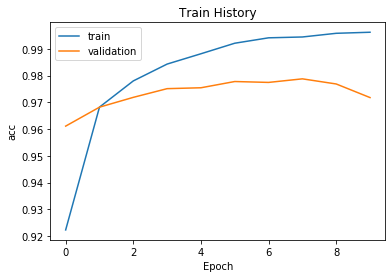

In [13]:
show_train_history(train_history,'acc','val_acc')

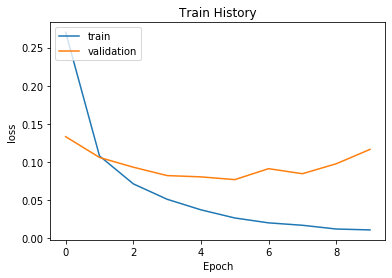

In [14]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 45us/step

accuracy= 0.9748


In [16]:
#建立第二個模型
model2 = Sequential()
#建構輸入層
model2.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model2.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
#建構輸出層
model2.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# 訓練模型
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
train_history2 =model2.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 156us/step - loss: 0.2353 - acc: 0.9302 - val_loss: 0.1433 - val_acc: 0.9543
Epoch 2/10
48000/48000 [==============================] - 7s 151us/step - loss: 0.0923 - acc: 0.9715 - val_loss: 0.0983 - val_acc: 0.9702
Epoch 3/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.0639 - acc: 0.9797 - val_loss: 0.0920 - val_acc: 0.9742
Epoch 4/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.0468 - acc: 0.9852 - val_loss: 0.0896 - val_acc: 0.9760
Epoch 5/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.0356 - acc: 0.9885 - val_loss: 0.0861 - val_acc: 0.9756
Epoch 6/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.0311 - acc: 0.9900 - val_loss: 0.1059 - val_acc: 0.9756
Epoch 7/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.0262 - acc: 0.9914 - val_loss: 0.1008 - 

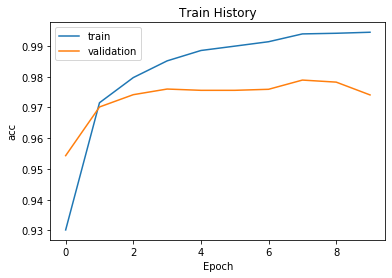

In [18]:
show_train_history(train_history2,'acc','val_acc')

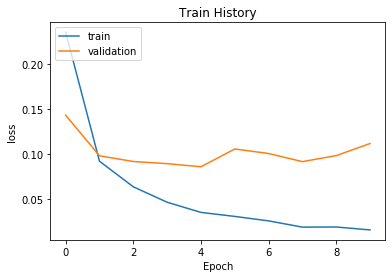

In [19]:
show_train_history(train_history2,'loss','val_loss')

In [20]:
scores2 = model2.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy2=',scores2[1])

10000/10000 [==============================] - 0s 46us/step

accuracy2= 0.9772


In [21]:
print(f'1 Layer accuracy={scores[1]}\n2 Layers accuracy={scores2[1]}')

1 Layer accuracy=0.9748
2 Layers accuracy=0.9772


In [0]:
# 兩層輸入層，提高精準度！